In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

In [3]:
# Dataset
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

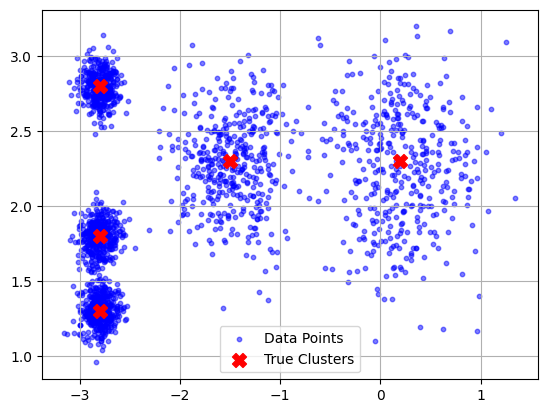

In [8]:
# Plot generated data
plt.scatter(X[:, 0], X[:, 1], s=10, c='blue', label="Data Points", alpha=0.5)
plt.scatter(blob_centers[:, 0], blob_centers[:, 1], c='red', s=100, marker='X', label="True Clusters")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# K-means
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
print("y_pred: ", y_pred)
print("kmeans.labels_: ", kmeans.labels_)
print("kmeans.cluster_centers_: ", kmeans.cluster_centers_)


y_pred:  [0 0 4 ... 3 1 0]
kmeans.labels_:  [0 0 4 ... 3 1 0]
kmeans.cluster_centers_:  [[-2.80214068  1.55162671]
 [ 0.08703534  2.58438091]
 [-1.46869323  2.28214236]
 [-2.79290307  2.79641063]
 [ 0.31332823  1.96822352]]


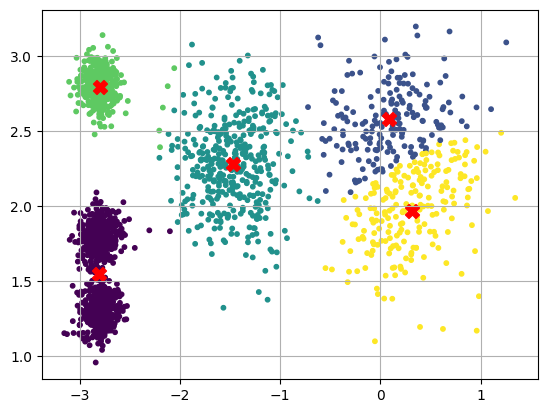

In [11]:
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, marker='X')

plot_clusters(X, y_pred)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

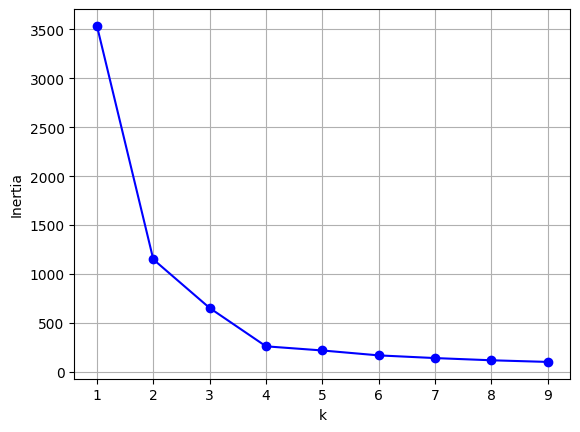

In [13]:
# Elbow
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [14]:
# K-means
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_k4 = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


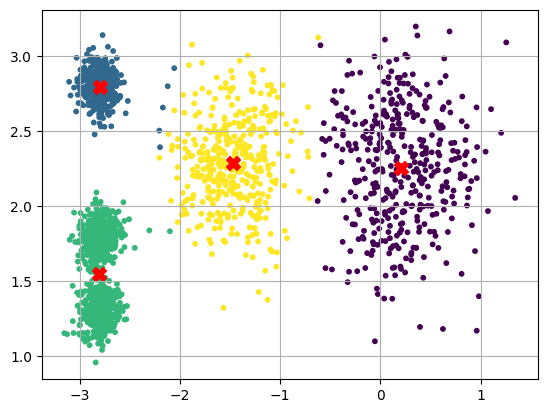

In [15]:
plot_clusters(X, y_pred_k4)
plt.grid()
plt.show()

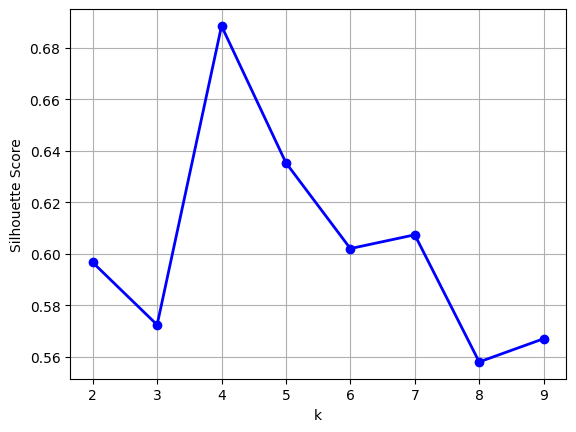

In [16]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.plot(range(2, 10), silhouette_scores, 'bo-', linewidth=2)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid()

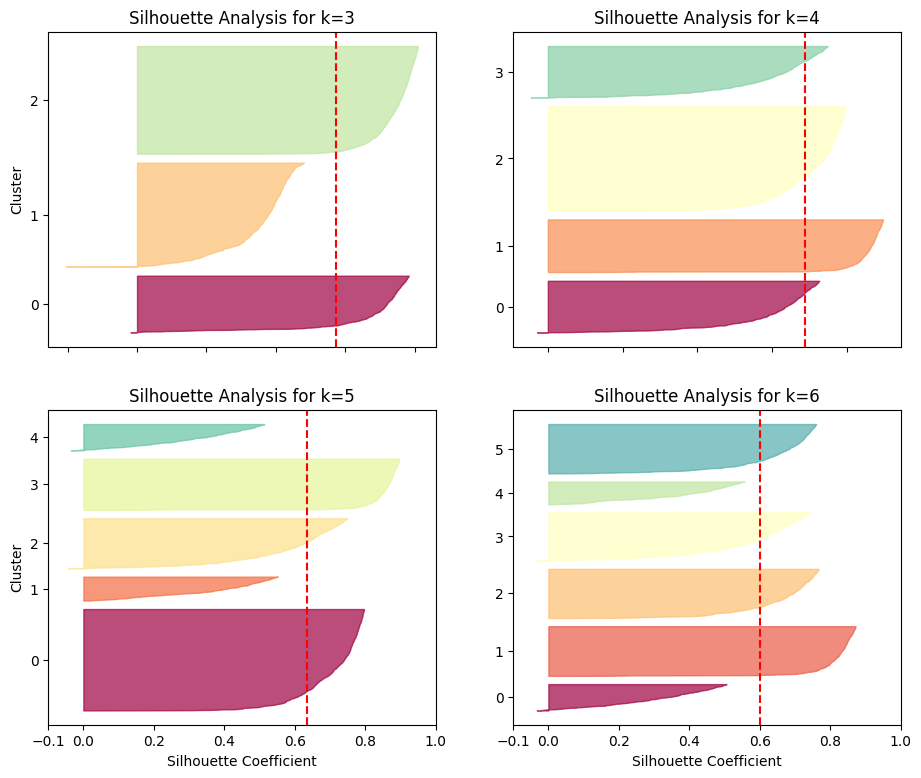

In [19]:
# Step 3: Silhouette Coefficient Visualization for Different Values of k
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))  # Create a large figure for subplots

# Loop over values of k (3, 4, 5, 6)
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)  # Create a 2x2 grid of plots, one for each k

    # Get predicted labels for the corresponding k
    y_pred = kmeans_per_k[k - 1].labels_

    # Calculate silhouette coefficients for each point
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30  # Define padding between clusters for better visibility
    pos = padding
    ticks = []  # To store tick positions for cluster labels
    for i in range(k):
        # Get silhouette coefficients for cluster i and sort them
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        # Assign a color for each cluster
        color = plt.cm.Spectral(i / k)

        # Fill the silhouette coefficients as a shaded area
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding  # Update position for the next cluster

    # Setting up y-axis ticks and labels for clusters
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Adding y-axis label for the first two plots
    if k in (3, 5):
        plt.ylabel("Cluster")

    # Adding x-axis labels for the last two plots
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Plot a vertical line showing the average silhouette score for each k
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"Silhouette Analysis for k={k}")

plt.show()  # Show the plots
